In [ ]:
# Below python packages are necessary to perform the exploratory data analysis of Iris Dataset. 
# Run this cell if necessary. 
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris

In [3]:
# Load the Iris dataset 
# X has the features and y has the taget 
X,y = load_iris(return_X_y=True,as_frame=True)

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
iris_data= pd.concat([X,y],axis=1)
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# Looking at the mean and median values, distribution of features seems to be symmetrical
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
%matplotlib inline

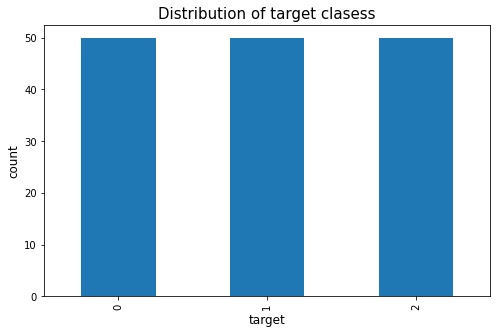

In [9]:
#It is a multi class classification. We have equal distribution of target clasess  
freq_cnts= iris_data.target.value_counts().sort_index()
plt.figure(figsize=(8,5))
freq_cnts.plot.bar()
plt.xlabel('target',size=12)
plt.ylabel('count',size=12)
plt.title('Distribution of target clasess',size=15)
plt.show()

In [10]:
# Below mean and median values of the features show that distribution is symmetrical
# For each species separately
iris_data.groupby(by='target').agg(['mean','median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                    mean median             mean median              mean   
target                                                                      
0                  5.006    5.0            3.428    3.4             1.462   
1                  5.936    5.9            2.770    2.8             4.260   
2                  6.588    6.5            2.974    3.0             5.552   

              petal width (cm)         
       median             mean median  
target                                 
0        1.50            0.246    0.2  
1        4.35            1.326    1.3  
2        5.55            2.026    2.0

In [11]:
# Created three dataframes for each target class
iris_setosa = iris_data.loc[(iris_data['target'] == 0),:].reset_index(drop=True)
iris_versicolor = iris_data.loc[(iris_data['target'] == 1),:].reset_index(drop=True)
iris_virginica = iris_data.loc[(iris_data['target'] == 2),:].reset_index(drop=True)

# Univariate data analysis

## Histograms

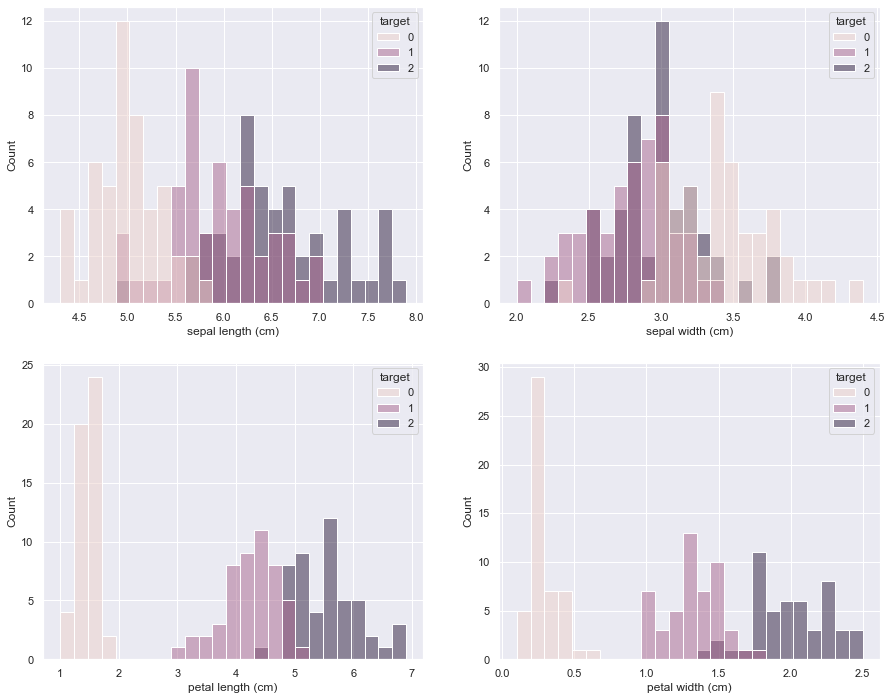

In [12]:
plt.figure(figsize=(15,12))
sns.set_theme()
for i,col in enumerate(iris_data.columns.drop('target')):
    #print(i,col)
    plt.subplot(2,2,i+1)
    sns.histplot(data=iris_data,x=col,color='#22BCCC',bins=25,hue='target')
plt.show()
    

From the above Histogram plots, we can infer the following:  

+ Petal Length and Petal width distributions of Iris Setosa species do not overlap with Petal Length and Petal Widith distributions of Iris Versicolor and Iris Virgina species
+ Petal Length distribution of Iris Setosa range from 1cm to 2cm or below. Iris Versicolor's range from ~3cm till ~5cm. Iris Virginica's range from ~4.5cm till ~7cm. Petal length feature can be used to classify Iris Setosa species from other species 
+ Petal width distribution of Iris Setosa range from ~0.1cm till 0.7cm. Iris Versicolor's range from 1cm till 1.6cm. Iris Virginica's range from 1.4cm till 2.5cm. Petal width feature can also be used to classify Iris Setosa species from other species 

## Box & Whisker plots

+ Boxplots provides an easy way to look at the 25th,50th,75th quartiles of the distribution.
+ 25th Quartile is also known as Q1, 75th Quartile is also knows as Q3. 50th Quartile is nothing but median. Q1-Q3 is known as Inter Quartie Range (IQR). Minimum value is calculated to be (Q1-1.5*IQR). Maximum value is (Q3+1.5*IQR).
+ All values outside the minimum and maximum values are denoted by dots as shown below. And those points are considered to be outliers.

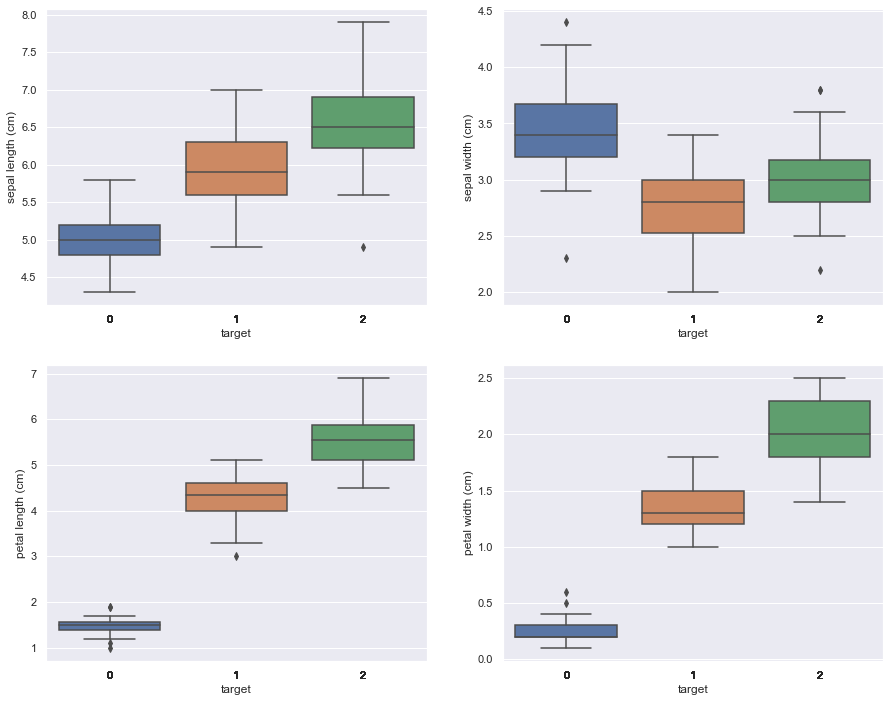

In [13]:
#Box plot 
plt.figure(figsize=(15,12))
sns.set_theme()
for i,col in enumerate(iris_data.columns.drop('target')):
    #print(i,col)
    plt.subplot(2,2,i+1)
    sns.boxplot(data=iris_data,x='target',y=col)
    plt.xticks(iris_data['target'])
plt.show()

## Violin Plots

+ Violin plots give a little more information than the box plots. You must have guessed it already but it is the probability density of the data smoothened by Kernal Density Estimator. 



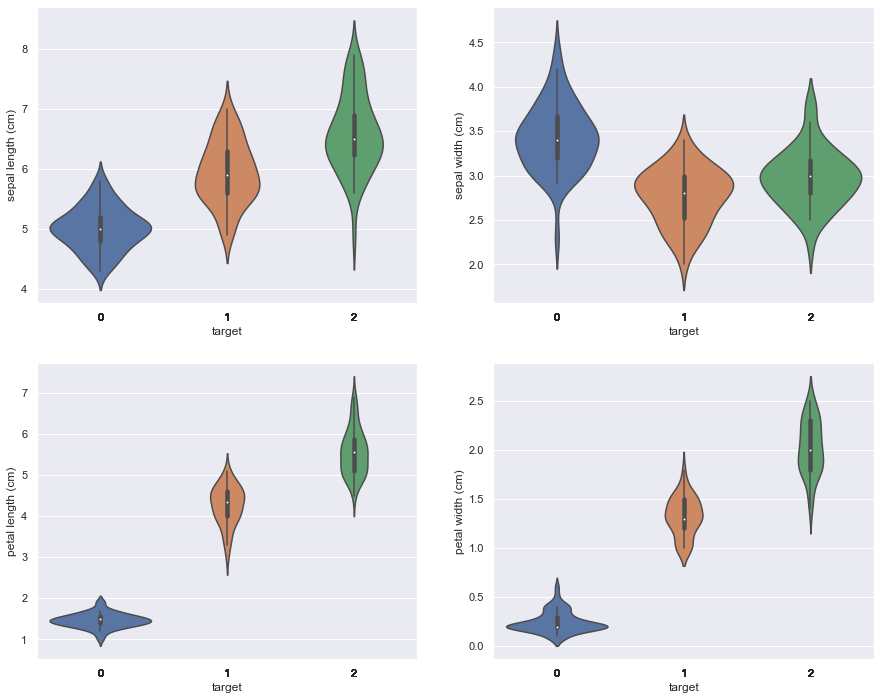

In [14]:
#Violin plot 
plt.figure(figsize=(15,12))
sns.set_theme()
for i,col in enumerate(iris_data.columns.drop('target')):
    #print(i,col)
    plt.subplot(2,2,i+1)
    sns.violinplot(data=iris_data,x='target',y=col)
    plt.xticks(iris_data['target'])
plt.show()

## Strip Plots

+ Strip Plots resemble more of Scatter plots but with only one feature. 
+ A strip plot is a simple way of visualising numerical data in different categories. 
+ It shows the distribution of the data for each category as individual datapoints.
+ The categories are displayed on the x-axis and the strips are vertical parallel to the y-axis

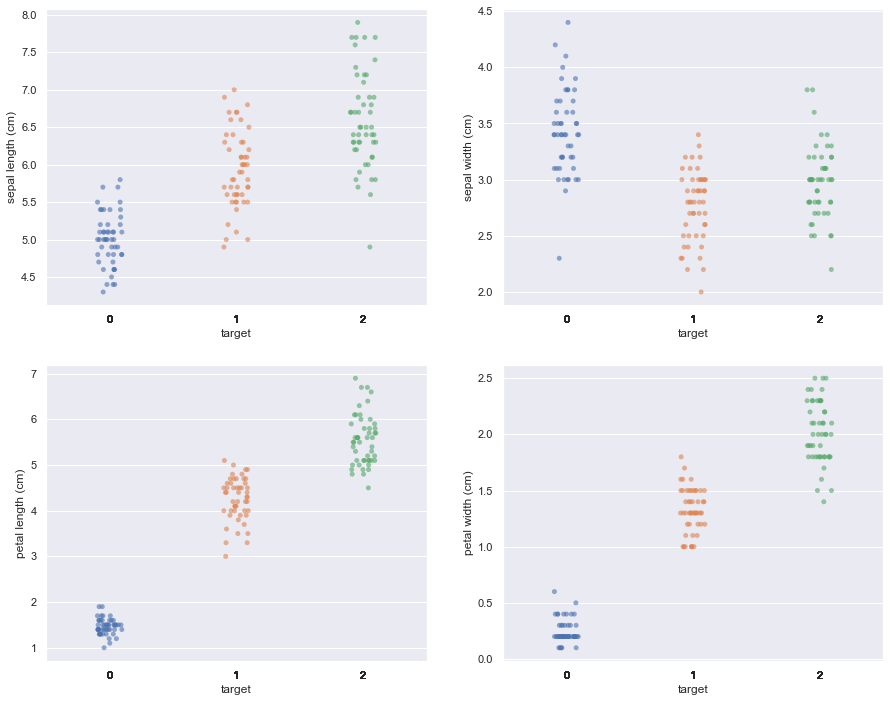

In [20]:
#Strip plot 
plt.figure(figsize=(15,12))
sns.set_theme()
for i,col in enumerate(iris_data.columns.drop('target')):
    #print(i,col)
    plt.subplot(2,2,i+1)
    sns.stripplot(data=iris_data,x='target',y=col,alpha=0.6)
    plt.xticks(iris_data['target'])
plt.show()

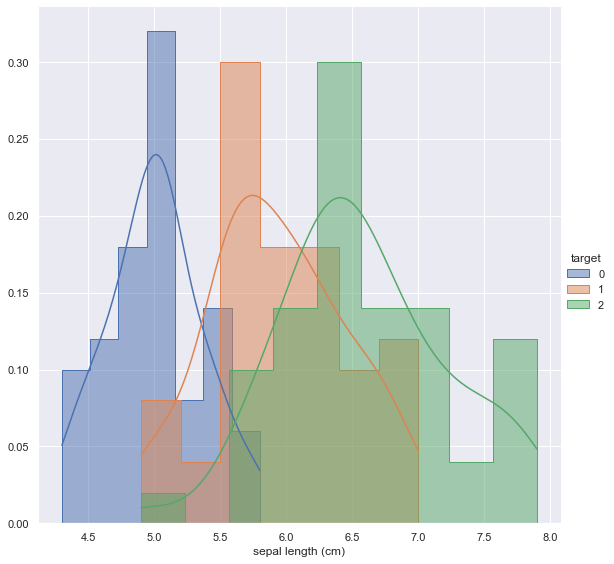

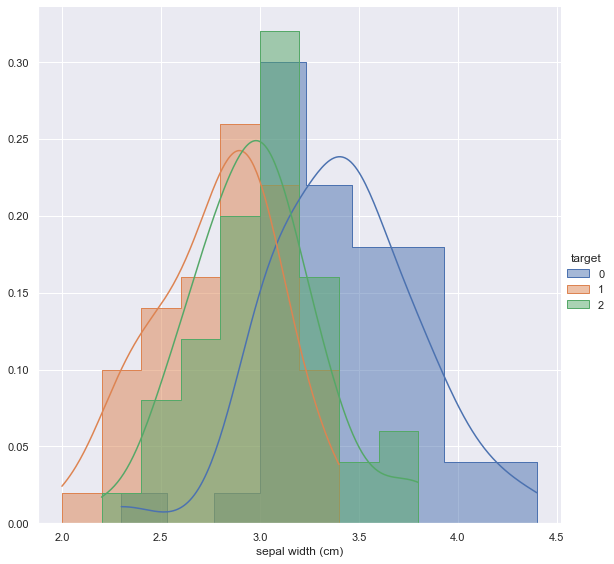

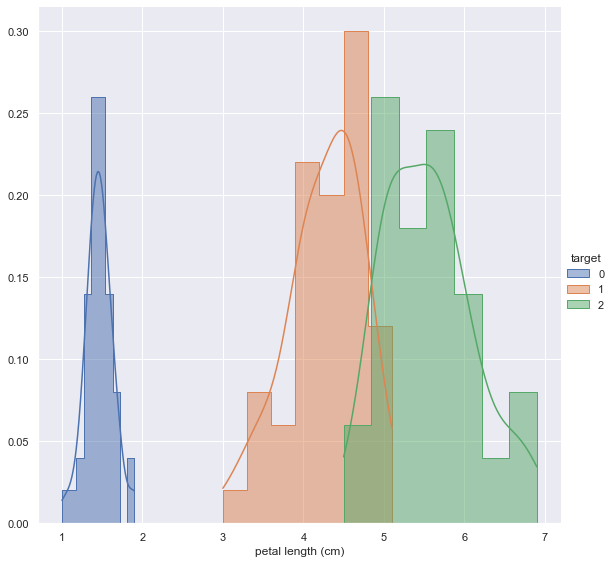

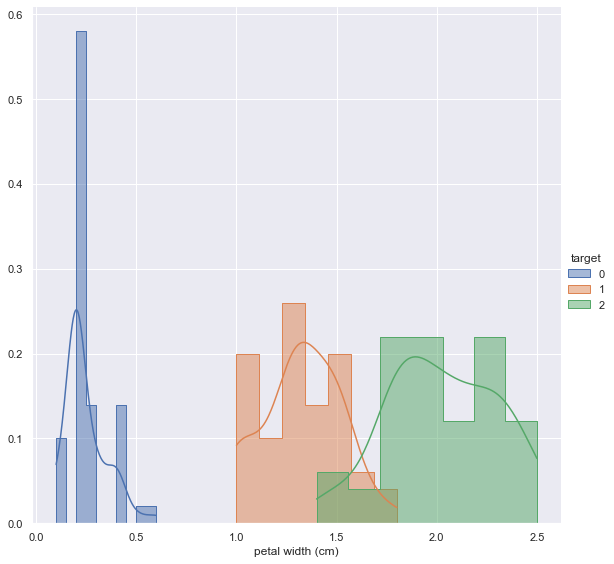

In [37]:
# Looking at the below plots, petal length, and petal width seem to be good features to classify iris flower species. 
# Especially to distinguish setosa from other species. 
# There is an overlap of distribution of petal length and petal width of other two iris species
# Which would make classification go wrong. To quantify the proportion of misclassified flowers 
# in the below analysis, let's plot CDF. 

for col in iris_data.columns.drop('target'):
    kwargs = {'kde':True}
    fg = sns.FacetGrid(data=iris_data,hue='target',height=8)
    fg.map(sns.histplot,col,element='step',**kwargs,stat='probability',common_norm=False).add_legend()
    plt.show()


In [23]:
# Cumulative Distribution Function plots 
# Mathematically, CDF is an integral of PDF over the range of values that a continuous random variable takes.
# CDF of a random variable evaluated at any point ‘x’ gives the probability that a random variable
# will take a value less than or equal to ‘x’.

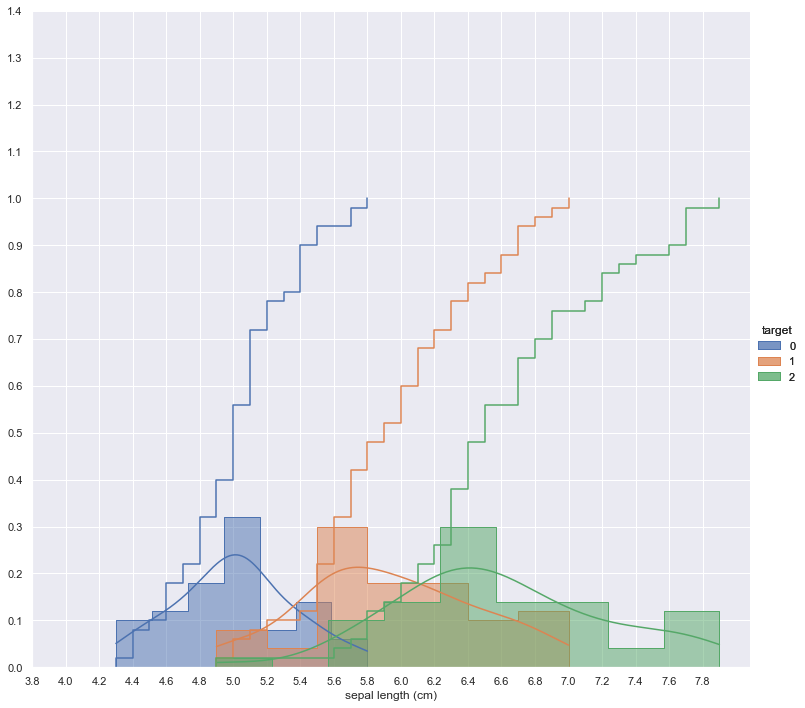

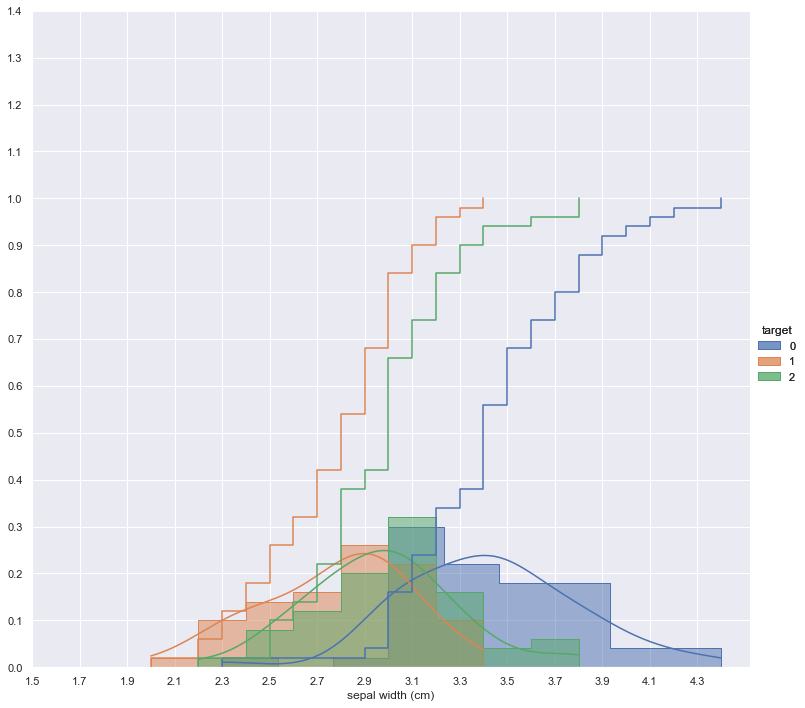

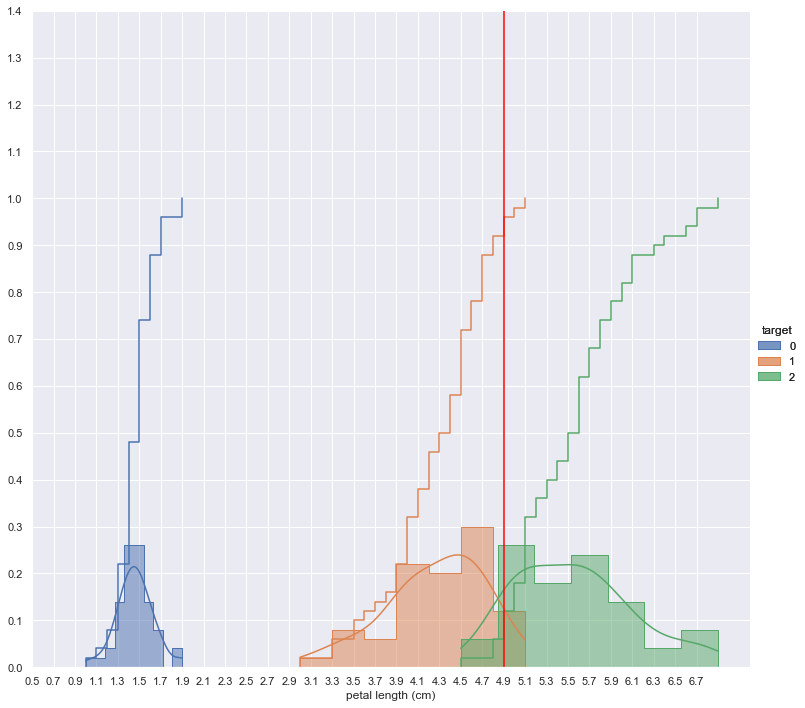

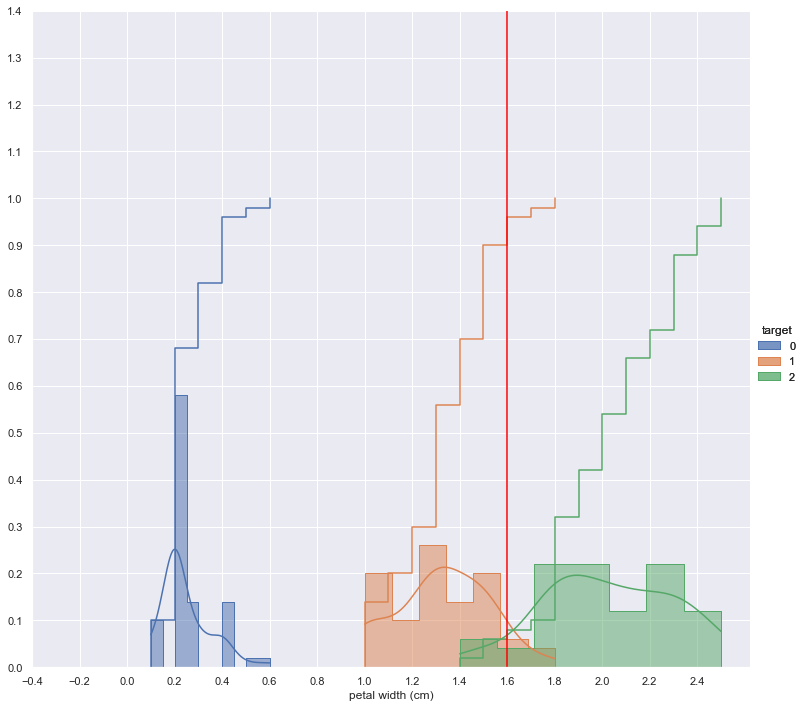

In [50]:
for col in iris_data.columns.drop('target'):
    kwargs = {'kde':True}
    fg = sns.FacetGrid(data=iris_data,hue='target',height=10)
    fg.map(sns.histplot,col,element='step',**kwargs,stat='probability',common_norm=False).add_legend()
    fg.map(sns.ecdfplot,col,stat='proportion').add_legend()
    plt.yticks(np.arange(0,1.5,0.1))
    plt.xticks(np.arange(iris_data[col].min()-0.5,iris_data[col].max(),0.2))
    
    if col == 'petal length (cm)':
        plt.axvline(x=4.9,ymin=0,ymax=1.5, color='red')
    if col == 'petal width (cm)':
        plt.axvline(x=1.6,ymin=0,ymax=1.5, color='red')
    plt.show()



From the above Cummulative Density Function plot of Petal Length and Petal Width features, we can infer the following: 
+ Iris Setosa species can be classifed either using petal length or petal width features with 100% probability if petal length is < 1.9 cms and/or petal width is < 0.6 cms 
+ 95% of Iris Versicolor species have petal length feature > ~3cm and < ~4.9cm and only ~5% of Iris Virginica speicies has petal length in that range
+ 90% of Iris Versicolor species have petal width feature > ~1cm and < ~1.6cm and only ~10% of Iris Virginica speicies has petal length in that range

## Bivariate analysis 


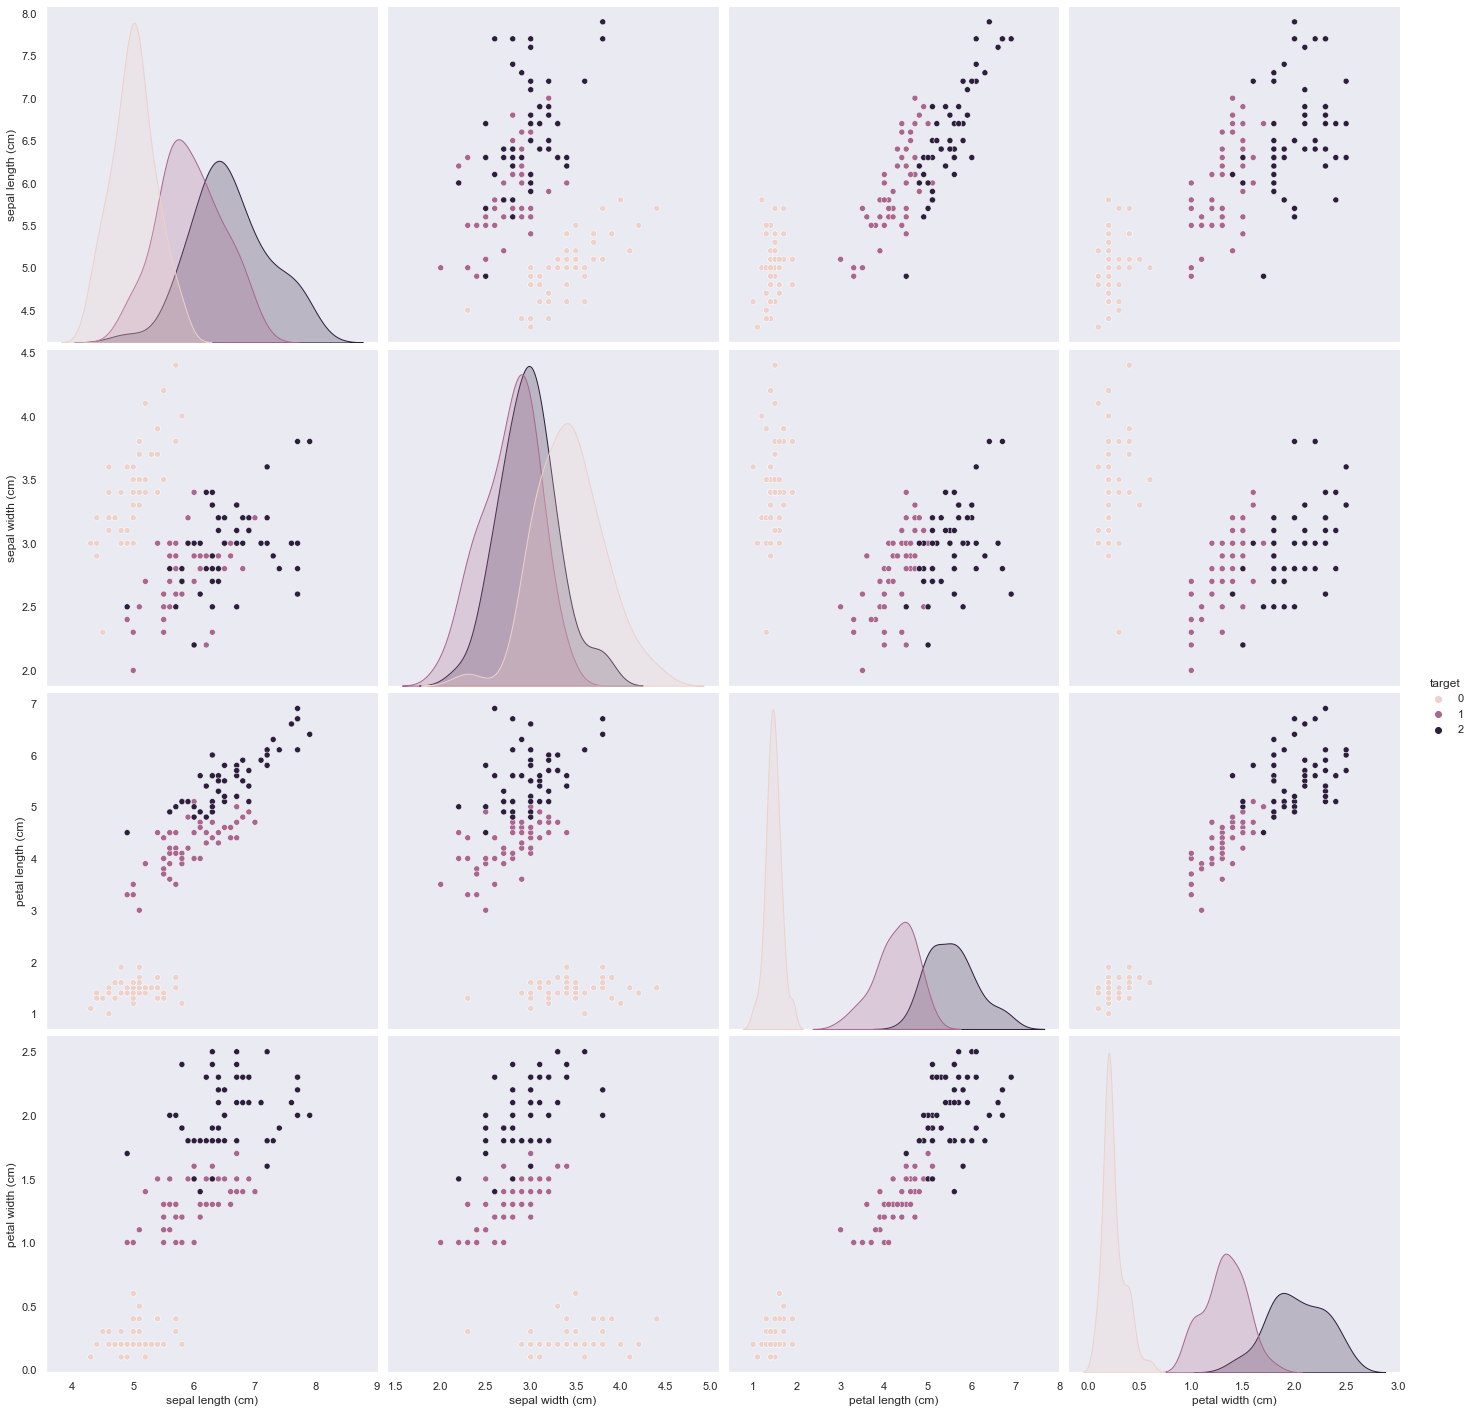

In [71]:
sns.set_theme(style='dark')
sns.set_palette(palette='pastel')
sns.pairplot(data=iris_data,hue='target',height =5,kind='scatter')
plt.show()

In [77]:
ftr_corr = iris_data.corr()
ftr_corr['target'].abs().sort_values()

sepal width (cm)     0.426658
sepal length (cm)    0.782561
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

<AxesSubplot:>

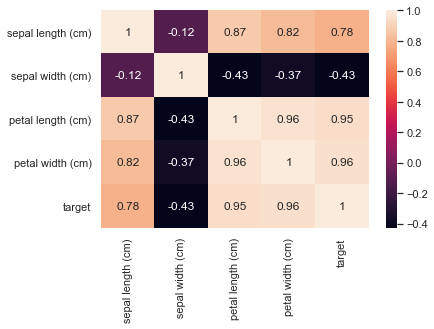

In [78]:
sns.heatmap(data=ftr_corr,annot=True)

In [80]:
iris_data.to_csv('../input/train.csv',index=False)

In [89]:
df = pd.read_csv('../input/train_folds.csv',index_col=None)
df.shape

(150, 6)

In [130]:
X_test = df[df['kfold'] ==4].reset_index(drop=True)
X_test = X_test.drop(['target','kfold'],axis=1).values
X_test

array([[5. , 3. , 1.6, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [4.4, 3. , 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [7.1, 3. , 5.9, 2.1],
       [6.5, 3.2, 5.1, 2. ],
       [4.7, 3.2, 1.3, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.8, 4. , 1.3],
       [4.4, 3.2, 1.3, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 3.5, 1.3, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [6.1, 2.8, 4.7, 1.2],
       [6. , 2.2, 4. , 1. ],
       [4.9, 3.6, 1.4, 0.1],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.4, 3.2, 5.3, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.7, 3. , 5. , 1.7]])

In [131]:
Y_test = df[df['kfold'] ==4].target.values
Y_test

array([0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1,
       0, 1, 0, 1, 2, 2, 1, 1])

In [119]:
import joblib

In [124]:
from sklearn import metrics

In [ ]:
metrics.f1_score

In [132]:
# load the model from disk

loaded_model = joblib.load(open('../models/dt_4_rf.bin', 'rb'))
Y_predict= loaded_model.predict(X_test)
score = metrics.f1_score(Y_test,Y_predict,average='micro')
print(score)

0.9333333333333333


In [116]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [133]:
from sklearn import preprocessing

In [134]:
std_scaler = preprocessing.

In [136]:
import argparse

In [ ]:
argparse.ArgumentParser().add_argument()